Define `gaussian_filter` & `find_peaks` on `ScalarField` & `VectorField`
========================================================================

In [1]:
import os
import sys

In [2]:
home = os.environ['HOME']
work_path = os.path.join(home, 'far/farMe/uFunc')
src_path = os.path.join(home, 'far/PHARE')
print(work_path)
print(src_path)

/home/smets/far/farMe/uFunc
/home/smets/far/PHARE


In [3]:
import subprocess
import pyphare
import matplotlib.pyplot as plt
from pyphare.pharesee.run import Run
from pyphare.core.operators import dot, cross, sqrt, modulus, grad
from pyphare.core.ufuncs import gFilt, gF, peakIds
import numpy as np

In [4]:
sys.path.append(os.path.join(src_path, "pyphare"))

In [5]:
Te = 0.2

In [6]:
run_path = os.path.join(work_path, 'wp_{0}'.format(Te))
print(run_path)

/home/smets/far/farMe/uFunc/wp_0.2


In [7]:
if os.path.isdir(run_path):
    files = os.listdir(run_path)
else:
    files = []
print(files)

['ions_charge_density.h5', 'ions_bulkVelocity.h5', 'EM_E.h5', 'EM_B.h5', 'ions_pop_protons_domain.h5']


In [8]:
if 'ions_charge_density.h5' not in files :
    os.chdir(work_path)
    subprocess.call(['/usr/bin/python3', work_path+'/wp.py', str(Te)])
    # subprocess.call(['mpirun', '-n', '4', '/usr/bin/python3', work_path+'/wp.py', str(Te)])

In [9]:
run  = Run(run_path)
time = 60.0

# Operation on `ScalarField`

In [10]:
N = run.GetNi(time)
type(N)

pyphare.pharesee.hierarchy.scalarfield.ScalarField

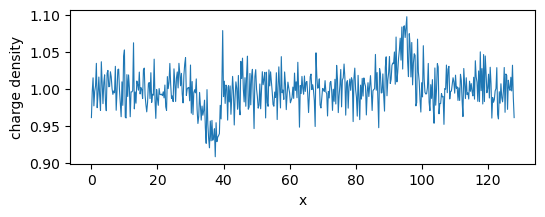

In [11]:
fig, ax = plt.subplots(figsize=(6,2))

N.plot(qty='value', ax=ax, ls='solid', lw=0.8, color='tab:blue', ylabel='charge density')

In [12]:
n = gFilt(N, sigma=6)

nb_ghosts (2) < sigma (6) : your gaussian filter might be dirty


In [13]:
nn = gF(N)

<class 'pyphare.pharesee.hierarchy.scalarfield.ScalarField'> ['__add__', '__call__', '__class__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__firstlineno__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__rtruediv__', '__setattr__', '__sizeof__', '__static_attributes__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '_compute_add', '_compute_mul', '_compute_rtruediv', '_compute_sub', '_compute_truediv', '_default_time', '_quantities', '_sim', 'add_time', 'box_to_Rectangle', 'data_files', 'dist_plot', 'domain_box', 'finest_level', 'global_max', 'global_min', 'has_file', 'has_time', 'interpol', 'is_homogeneous', 'level', 'levelNbr', 'levelNbrs', 'level_domain_box', 'levels', 'nbrPatches', 'nbytes', 'ndi

KeyError: 'value'

In [ ]:
pks_plus = peakIds(n, height=1.05)
# pks = peakIds(n, prominence=(0.02))
pks_minus = peakIds(-n, names=['value',], height=-0.95)

In [ ]:
fig, ax = plt.subplots(figsize=(6,2))

N.plot(qty='value', ax=ax, ls='solid', lw=1.0, color='tab:blue', ylabel='charge density')
n.plot(qty='value', ax=ax, ls='solid', lw=2.0, color='tab:orange', ylabel='charge density')
for p in pks_plus:
    ax.axvline(x=p, color='black', linestyle='dashed')
for p in pks_minus:
    ax.axvline(x=p, color='black', linestyle='dotted')

# Operation on `VectorField`

In [ ]:
V = run.GetVi(time)
type(V)

In [ ]:
fig, ax = plt.subplots(figsize=(6,2))

V.plot(qty='x', ax=ax, ls='solid', lw=1.0, color='tab:blue', ylabel='X-velocity')

In [ ]:
v = gFilt(V, sigma=6)

In [ ]:
fig, ax = plt.subplots(figsize=(6,2))

V.plot(qty='x', ax=ax, ls='solid', lw=1.0, color='tab:blue', ylabel='X-velocity')
v.plot(qty='x', ax=ax, ls='solid', lw=2.0, color='tab:orange', ylabel='X-velocity')

In [ ]:
pks = peakIds(v, height=0.02)

In [ ]:
fig, ax = plt.subplots(figsize=(6,2))

V.plot(qty='x', ax=ax, ls='solid', lw=1.0, color='tab:blue', ylabel='X-velocity')
v.plot(qty='x', ax=ax, ls='solid', lw=2.0, color='tab:orange', ylabel='X-velocity')
for p in pks:
    ax.axvline(x=p, color='black', linestyle='dotted')

# Get an interpolator on a `ScalarField`

In [ ]:
inter = N.interpol(run, time)

In [ ]:
fn, x_ = inter['value']
x = np.asarray(x_[0])
x = np.arange(0, 150)

In [ ]:
fig, ax = plt.subplots(figsize=(6,2))

ax.plot(x, fn(x))
ax.set_xlabel('x')
ax.set_ylabel('charge density')

# Get an interpolator on a `VectorField`

In [ ]:
inter = V.interpol(run, time)

In [ ]:
fvx, x_ = inter['x']
x = np.asarray(x_[0])

In [ ]:
fig, ax = plt.subplots(figsize=(6,2))

ax.plot(x, fvx(x))
ax.set_xlabel('x')
ax.set_ylabel('X-velocity')

In [ ]:
for ilvl, lvl in N.levels(time).items():
    for patch in lvl.patches:
        names = list(patch.patch_datas.keys())
        print('names      : {}'.format(names))
        print("id         : {}".format(patch.id))
        print("box        : {}".format(patch.patch_datas[list(patch.patch_datas.keys())[0]].box))
        print(dir(patch.patch_datas[list(patch.patch_datas.keys())[0]]))
        for name in names:
            pdata = patch.patch_datas[name]
            # print("name       : {}".format(name))
            print("size [{}]  : {}   -   {}".format(name, pdata.size, pdata.centerings))
        print(" --- ")
        break